P(3 <= Y < 6) Approximation: 0.5722615234339066


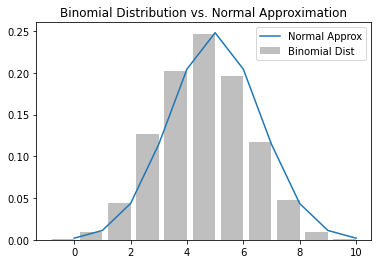

In [66]:
import math
import random
import matplotlib.pyplot as plt
from collections import Counter

num_trials = 10
prob = 1/2
sigma = 2.5
mean = 5

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

answer = normal_pdf(3, 5, math.sqrt(sigma)) + normal_pdf(4, 5, math.sqrt(sigma)) + normal_pdf(5, 5, math.sqrt(sigma))
print(f"P(3 <= Y < 6) Approximation: {answer}")

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
    [v / num_points for v in histogram.values()],
    0.8,
    color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
    for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.legend(["Normal Approx", "Binomial Dist"])
    plt.show()

make_hist(1/2, 10, 10000)

In [44]:
# Question 3

n = 8
sigma = 72
x_bar = 85
z_percentage = {
    "99": 2.575,
    "95": 1.96,
    "90": 1.645,
    "80": 1.28
}

def confidence_interval(n, sigma, x_bar):
    for key, val in z_percentage.items():
        low = x_bar - (val * (sigma)/math.sqrt(n))
        high = x_bar + (val * (sigma)/math.sqrt(n))
        print(f"{key}% confidence interval is {low} to {high}")
        
    
confidence_interval(n, sigma, x_bar)
    


99% confidence interval is 19.45120138400705 to 150.54879861599295
95% confidence interval is 35.10654551947721 to 134.8934544805228
90% confidence interval is 43.12513641813266 to 126.87486358186734
80% confidence interval is 52.41651952292389 to 117.58348047707611


In [69]:
# Question 4

# (a)
sd = 2
n = 9
se = sd / math.sqrt(n)
# P(Z > (11.5 - 10) / (2 / 3))
# P(Z > 2.25)
sig_level = 0.0122
print(f"Significance Level: {sig_level}")

# (b)
# P(Mean > 11.5) for a true mean of Mu
# converting to standard normal variable
# P(Z > ((11.5 - Mu) / (2 / 3)))
# 1 - Phi(17.25 - 1.5Mu)
def uniform_cdf(x):
    if x < 0: 
        return 0 # uniform random is never less than 0
    elif x < 1: 
        return x # e.g. P(X <= 0.4) = 0.4
    else: 
        return 1 # uniform random is always less than 1

Mu = 11.5 # This is what you plug into the function
def power_function(Mu):
    return 1 - uniform_cdf(17.25 - 1.5 * Mu)
print(f"Power Function Output with Mu = {Mu}: {power_function(Mu)}")

# (c)
# K(11) = 1 - Phi(0.75)
print(f"K(11): {power_function(11)}")
# From standard normal tables
# K(11) = 1 - 0.7734 = 0.2266 is the power of the test
# For a true mean of 11.5, we compute the same here:
print(f"K(11.5): {power_function(11.5)}")
# For a true mean of 12, we compute the same here:
print(f"K(12): {power_function(12)}")

# (d)
x_bar = 12
mu_0 = 10
sigma = 2
n = 9
z = (x_bar - mu_0)/(sigma/math.sqrt(n))
print(f"Z for 12: {z}")
print("P-Value: 0.0013")

# P-Value obtained from standard normal v table:
# P(Z > 3) = 0.0013 is the p-value

x_bar = 12.5
z = (x_bar - mu_0)/(sigma/math.sqrt(n))
print(f"Z for 12.5: {z}")
print("P-Value: 0.0001")

# P-Value obtained from standard normal v table:
# P(Z > 3.75) = 0.0001 is the p-value


Significance Level: 0.0122
Power Function Output with Mu = 11.5: 1.0
K(11): 0.25
K(11.5): 1.0
K(12): 1
Z for 12: 3.0
P-Value: 0.0013
Z for 12.5: 3.75
P-Value: 0.0001
